### • Business Understanding

•  **Introduction:** The project involves working with the statistical data of the college students playing basketball. In this learning task, the goal is to predict whether a college basketball player will be drafted to join the NBA league based on their statistics.

The annual NBA draft is a highly anticipated event where NBA teams select players from American colleges and international professional leagues to join their rosters. Being drafted to the NBA is a significant achievement for any basketball player, marking a transition to the professional league. This event captures the attention of sports commentators, fans, and enthusiasts who eagerly track the careers of college players and speculate about their chances of being selected by NBA teams.


• **Dataset:** The dataset provided contains a wide range of features that illuminate players' performance during their college basketball season.
The dataset comprises 64 players' performance attributes, including Games Played (GP), Minutes Played (Min_per), Offensive Rating (ORtg), Defensive Rating (DRtg), Field Goals Made (twoPM), Free Throws Made (FTM), and many others offer insights into various facets of a player's playing style and contribution to their team.

        Basketball Players Metadata: metadata.csv
        Basketball Players Training dataset: train.csv
        Basketball Players Testing dataset: test.csv


• **Business Problem:** Build a Binary Classification predictive model capable of accuratly determining the likelihood of a college basketball player being drafted into the NBA based on their performance statistics from their records. The model's accurate predictions can provide valuable insights for both players and teams, aiding decision-making during the NBA draft process. Additionally, this model will offer valuable insights to sports commentators, fans, and scouts, aiding them in predicting the potential NBA draft prospects of individual players.

The primary evaluation metric for this task is the AUROC: Area Under the ROC (Receiver Operating Characteristic) Curve.

The subsequent activities are performed for this Binary Classification. 

• Business Understanding

• Data Understanding

        1] Loading Data
        2] Exploring Data

• Data Preparation

        3] Handling Missing Values
                - Treating missing values in numerical and categorical features 
                - Verifying and Removing Identifiers
        4] Featuring Engineering
                - Calculating the players' height in centimeter
        5] Transforming Categorical Data into Numerical
        6] Predictors Selection using Feature Importance insights
                - Selecting predictors
                - Checking the outliers and distribution of values of the selected features
        7] Splitting Data into Different Sets
                - Accessing if imbalance and employing SMOTE for addressing
                - Selecting Target variable and Predictors
                - Splitting the sampled dataset into training - 80% and validation - 20%
        8] Features Scaling

• Modeling

        9] Assessing Baseline Performance
        10] Training Binary Classification Model
                - Logistic Regression

• Model Evaluation

        11] Analysing Model Performance

• Summary Insights and Recommendations

## Building a Classification Model

Note: This notebook comparises tasks associated with developing and assessing a classification model.

In [34]:
# Importing Python and the necessary libraries
import pandas as pd
import numpy as np

# Importing necessary Data Visualization libraries
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

# Importing SKLearn and other libraries necessary for building binary classification model
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing dump library from joblib
from joblib import dump

# Importing formatting and other required libraries
import os
import sys
import warnings
from scipy.stats import randint

# Including the project root directory
sys.path.append('/Users/monalipatil/Monali/MDSI-Semester1/Advanced Machine Learning Application/Assignment1/adv_mla_assignment1')

# Importing class and functions defined from the KRML package to build machine learning classiffication model
from my_krml_package.data.sets import load_datasets
from my_krml_package.models.null import NullAccuracy
from my_krml_package.models.performance import display_performance_score, evaluate_classifier_dataset, train_evaluate_classifier
import my_krml_package.models.performance as krp


In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
#Ignoring warnings to maintain a clean coding.
warnings.filterwarnings('ignore')

• Loading the processed datasets for building a machine learning model.

In [37]:
# Invoking the function to load the saved datasets from the data/processed directory
X_train, y_train, X_validate, y_validate, X_test, y_test = load_datasets(path='../data/processed/')

• Verify dimensions of the datasets following the loading process.

In [14]:
# Confirming the dimensions of the datasets post loading process
print('Predictors:')
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)

print('\nTarget Variable:')
print(y_train.shape)
print(y_validate.shape)

Predictors:
(88888, 23)
(22222, 23)
(4970, 23)

Target Variable:
(88888,)
(22222,)


### • Modeling

#### 7] Assessing Baseline Performance

#### Rationale:

* The baseline performance serves as the most basic model that consistently predicts a fixed baseline value. This aids in assessing the effectiveness of the trained classification models, ensuring that our progress is in the correct direction.

Baseline AUROC score: 0.5


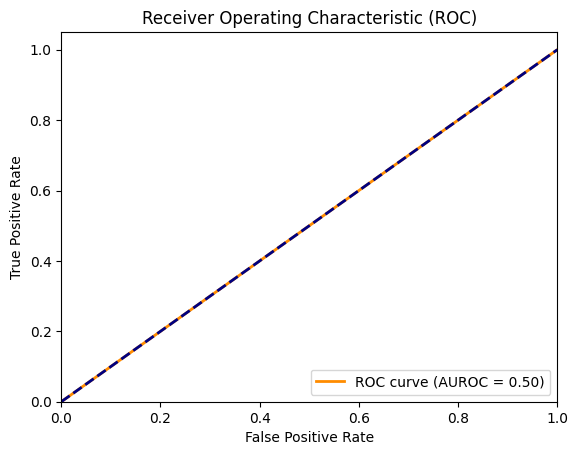

In [38]:
# Creating the object for the NullAccuracy class 
baseline = NullAccuracy()

# Invoking a method to evaluate the baseline performance score
y_base = baseline.fit_predict(y_train)

# Invoking the function to display the baseline performance score
display_performance_score(y_variable_actuals=y_train, y_variable_predicts=y_base, dataset_name='Baseline')


#### 8] Training Binary Classification Models

#### Rationale:

*  The target variable is binary, containing 0 signifying players who are not selected, and 1 representing drafted players. With our goal to predict outcomes within these two classes, a Binary Classification model is appropriate, aligning with the objective of categorizing players into these distinct groups.

* In this experiment, employing the AdaBoost algorithm, which is popular and effective algorithm for binary classification task, improving the performance of weak learners, making it a valuable tool to precisely assess if the player will be chosen for the NBA league.

* Employing AUROC (Area Under Receiver Operating Characteristic) is performance metirc that can use to evaluate binary classification models. It shows the trade-off between true positive rate (TPR) and false positive rate (FPR) across different decision thresholds.

#### * Experiment 1

• Instantiating instance of the AdaBoost Classifier.

In [39]:
# Generating a 'adaboost' instance using the AdaBoostRegressor class with its hyperparameters
adaboost = AdaBoostClassifier(random_state=0, n_estimators=1000)

• Fitting the AdaBoost Classifier model with the training data.

In [40]:
# Training the AdaBoost Classifier model using the important features of the training dataset
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000, random_state=0)

• Saving the fitted model into the models directoy as a file named 'adaboostclassifier_default.joblib'

In [41]:
# Storing the fittted classification model in the models directory and naming the file as 'adaboostclassifier_default_tuned.joblib'
dump(adaboost, '../models/adaboostclassifier_default_tuned.joblib')

['../models/adaboostclassifier_default_tuned.joblib']

• Predicting the results for training and validation datasets using trained model. 

In [42]:
# Predicting from the trained model for the training and validation datasets storing the results in 'y_train_predicts' and 'y_validate_predicts' variables.
y_train_predicts = adaboost.predict(X_train)
y_validate_predicts = adaboost.predict(X_validate)

• Displaying the performance metrics for the training and validation datasets.

Training AUROC score: 0.9905416247006616


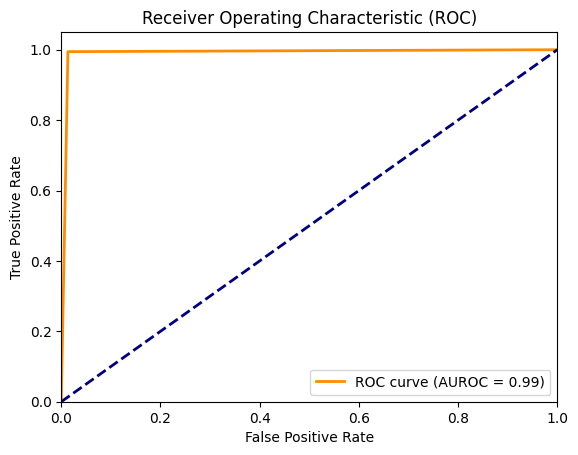

Validation AUROC score: 0.9883427585861414


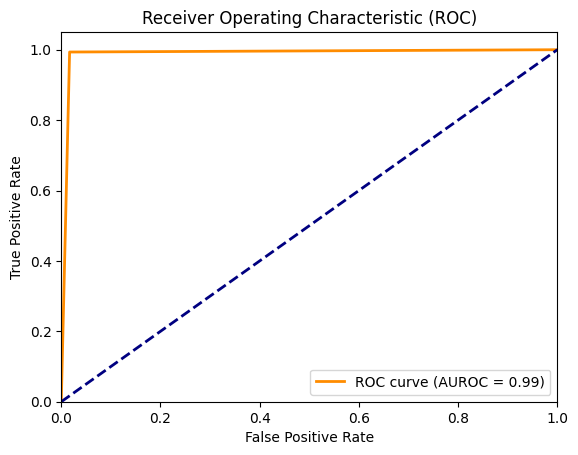

In [43]:
# Invoking the function to display the performance scores for traning and validation datasets
display_performance_score(y_variable_actuals=y_train, y_variable_predicts=y_train_predicts, dataset_name='Training')
display_performance_score(y_variable_actuals=y_validate, y_variable_predicts=y_validate_predicts, dataset_name='Validation')

• Displaying the confusion matrix for the training and validation datasets.

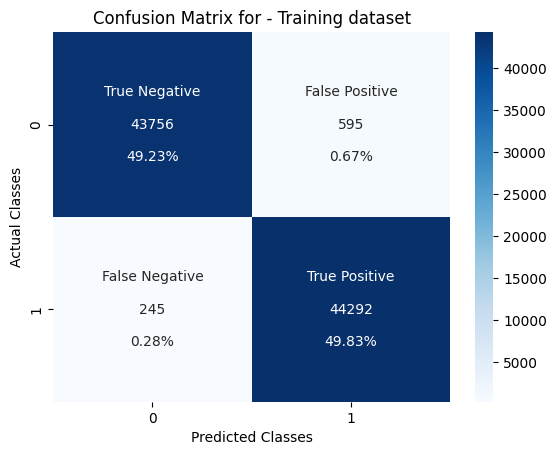

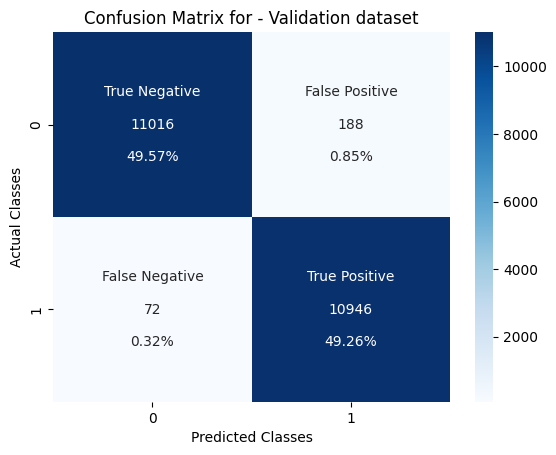

In [44]:
# Invoking the function to display the confusion matrix for traning and validation datasets
krp.display_confusion_matrix(y_variable_actuals=y_train, y_variable_predicts=y_train_predicts, dataset_name='Training')
krp.display_confusion_matrix(y_variable_actuals=y_validate, y_variable_predicts=y_validate_predicts, dataset_name='Validation')

#### Insight:

* The AUROC performance score achieved by the model on the training set is higher than the baseline performance score.

* The AUROC performance score of 0.9883 on the validation set is slightly below the score of 0.9905 achieved on the training set, suggesting that the model is exhibiting a very minor degree of overfitting.

* Furthermore, examining the ROC curves for both the training and validation datasets, which visually illustrate the balance between True Positive Rate (TPR) and False Positive Rate (FPR) at various threshold values, it indicates that the model shows a relatively consistent performance on both the datasets.

#### * Experiment 2

• Instantiating instance of the AdaBoost Classifier.

In [45]:
# Generating a 'adaboost1' instance using the AdaBoostRegressor class with the hyperparameters
adaboost1 = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=1.0, algorithm='SAMME', random_state=9)

• Fitting the AdaBoost Classifier model with the training data, predicting and display its performance scores.

Training AUROC score: 1.0


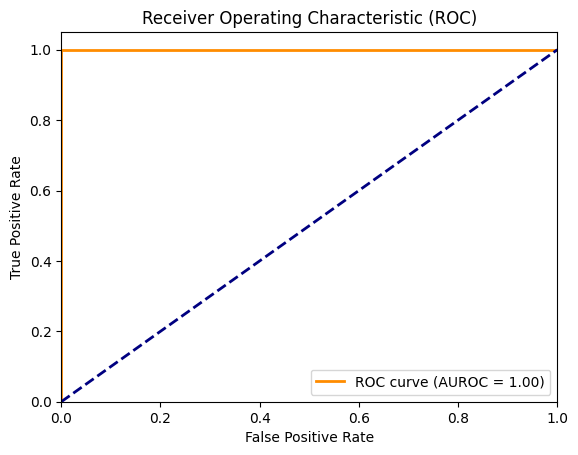

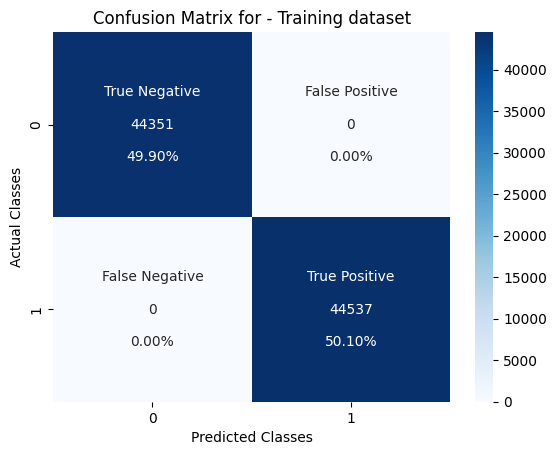

In [46]:
# Invoking the funtion to fit the classifier model using the important features and predict, display the performance scores of the training dataset
adaboost1 = train_evaluate_classifier(adaboost1, X_train, y_train)

• Predicting the results for the validation dataset using trained model and displaying its performance metrics. 

Validation AUROC score: 0.9844012757288081


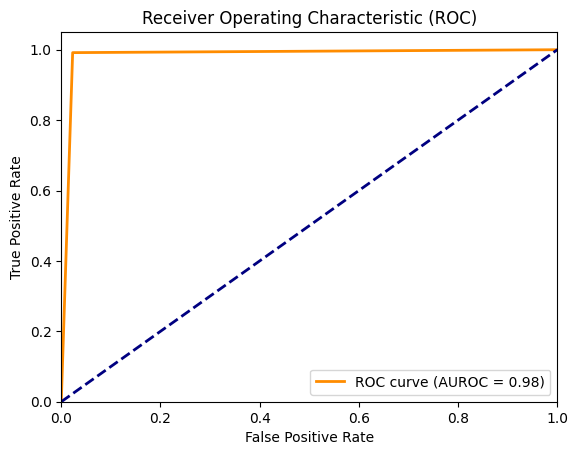

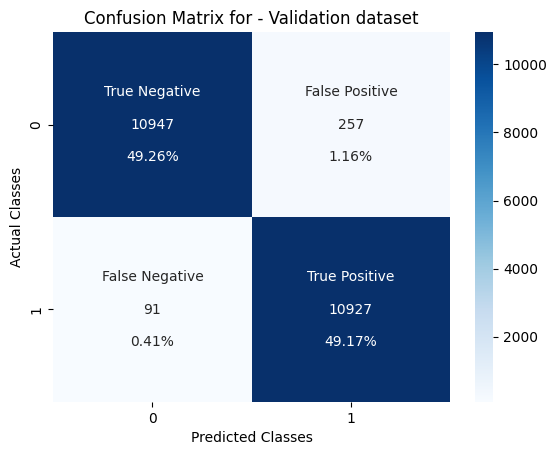

In [47]:
# Invoking the function to predict classes for the validation dataset and display the performance scores
evaluate_classifier_dataset(adaboost1, X_validate, y_validate, dataset_name='Validation')

#### * Experiment 3

• Instantiating instance of the AdaBoost Classifier.

In [48]:
# Generating a 'adaboost2' instance using the AdaBoostRegressor class with the hyperparameters
adaboost2 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=487, min_samples_leaf=14, class_weight='balanced', criterion='entropy', max_features = 'log2'), 
                               n_estimators=209, learning_rate=1.0, algorithm='SAMME', random_state=9)

• Fitting the AdaBoost Classifier model with the training data, predicting and display its performance scores.

Training AUROC score: 1.0


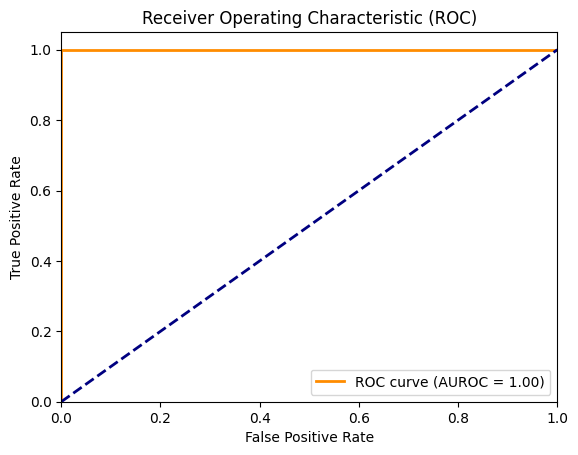

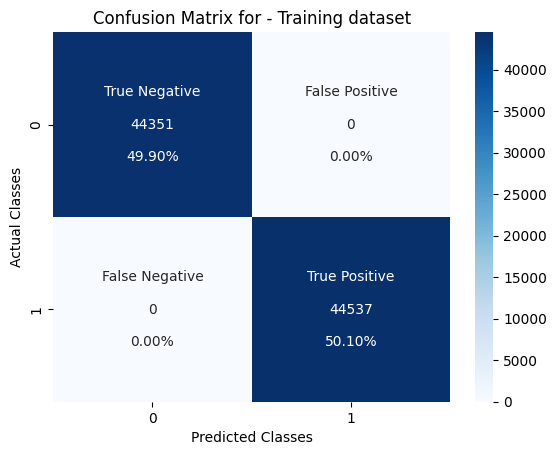

In [49]:
# Invoking the funtion to fit the classifier model using the important features and predict, display the performance scores of the training dataset
adaboost2 = train_evaluate_classifier(adaboost2, X_train, y_train)

• Predicting the results for the validation dataset using trained model and displaying its performance metrics. 

Validation AUROC score: 0.9945108889682257


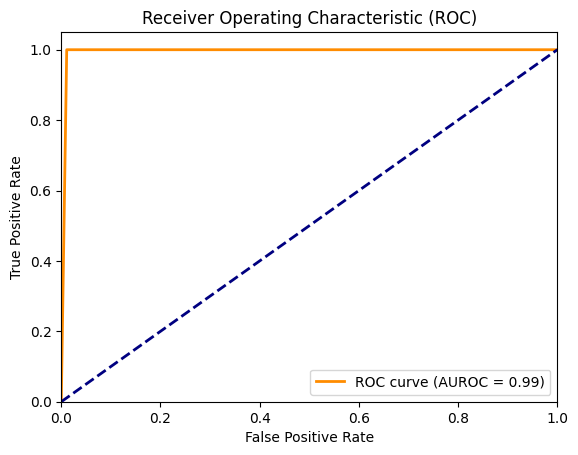

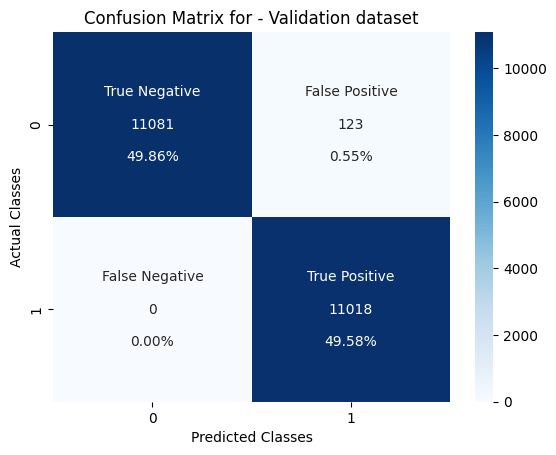

In [50]:
# Invoking the function to predict classes for the validation dataset and display the performance scores
evaluate_classifier_dataset(adaboost2, X_validate, y_validate, dataset_name='Validation')

#### Insights:

            * Experiment 2: Training - 1.0, Validation 0.9844
            * Experiment 3: Training - 1.0, Validation 0.9945

* There is slight difference in AUROC scores between the training and validation datasets illustrating that the models from both the experiments, with its hyperparameters, shows consistent performance across datasets, with marginal distinctions.

* The ROC curves for both the training and validation datasets in both experiments are relatively closer to the upper-left corner, indicating that the model exhibits subtle variations in its behavior between the two datasets. Therefore, the models exhibits a mild form of overfitting.

* Furthermore, the relatively high False Positive errors of 595 in the training set and 188 in the validation set from the first experiment stand out when compared to the False Positive errors from the third experiment with 0 for training and 123 for validation. 

* However, the AUROC score from experiment 3 suggests that the model is significantly overfitting in comparison to the AUROC score of experiment 1 informing that the model has not generalised enough on the new unseen data.

### • Model Evaluation

#### 9] Analysing Model Performance

• Assessing the performance of the model using the testing dataset.

In [31]:
# Evaluating the model's performance using the testing dataset
y_test_predicts = adaboost2.predict_proba(X_test)

In [32]:
# Loading the testing dataset required for the kaggle submission
# Note: Change this path to the relevant directory
absolute_path = os.path.abspath('/Users/monalipatil/Monali/MDSI-Semester1/Advanced Machine Learning Application/Assignment1/adv_mla_assignment1')
df_testing = pd.read_csv(absolute_path + '/data/raw/test.csv')

In [33]:
# Preparing results for the kaggle submission
df_kaggle_submission = pd.DataFrame({'player_id': df_testing['player_id'], 'drafted': y_test_predicts[:, 1]})
df_kaggle_submission.to_csv(absolute_path + '/data/processed/Patil_Monali-14370946-week3_AdaBoost_Results1_Tuned.csv', index=False)

### • Summary Insights and Recommendations

* The features that have a significant impact on the selection of NBA league players include 'dporpag,' 'porpag,' 'bpm,' 'gbpm,' 'adjoe,' 'ogbpm,' 'stops,' 'twoPA,' 'obpm,' 'twoPM,' 'dunksmade,' 'dunksmiss_dunksmade,' 'pts,' 'dreb,' 'FTM,' 'FTA,' 'treb,' 'blk,' 'Min_per,' 'usg,' 'ht_cm,' 'Ortg,' and 'midmade_midmiss.'

* •	In the 1st experiment, the AUROC performance score of 0.9752 on the testing set is slightly below the score of 0.9883 and 0.9905 achieved on the validation and training set, suggesting that the model is exhibiting a small degree of overfitting. 

* Utilizing the insights from important features, the Adaboost classifier in the 1st experiment achieved the better performance than the models from 2nd and 3rd experiment with hyperparameters, which indicates a slight tendency toward overfitting, and the model may not be sufficiently generalized to make accurate predictions for potential draft selections on new, unseen data.

* Assessing all the trained models the three week experiments, it is clear that the AdaBoost classifier from the 1st experiment of this third week, utilizing Feature Importance information, stands out as the most efficient model.